<a href="https://colab.research.google.com/github/FikriFiRus17/Tim-FF-Image-classification-buah-dan-sayur-apel-pisang-dan-pare-/blob/main/FF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 14.8 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 141 kB 52.1 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 212 kB 63.2 MB/s 
     |████████████████████████████████| 57 kB 6.0 MB/s 
     |████████████████████████████████| 2.3 MB 49.7 MB/s 
     |████████████████████████████████| 275 kB 47.0 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 80 kB 8.5 MB/s 
     |████████████████████████████████| 68 kB 8.3 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 856 kB 57.8 MB/s 
     |████████████████████████████████| 4.1 MB 71

In [ ]:
import gradio as gr

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
# from tensorflow.keras.layers import 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# import pathlib
# dataset_url = "https://download1337.mediafire.com/yhgits6y0kdg/e2l6lqmva4h1ae9/dataset_rempah.zip"
# data_dir = tf.keras.utils.get_file('dataset_rempah', origin=dataset_url, untar=True)
# # data_dir = pathlib.Path(data_dir)
data_dir = '/content/drive/MyDrive/fruits_image_classification/'
print(data_dir)

/content/drive/MyDrive/fruits_image_classification/


In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 960 files belonging to 3 classes.
Using 768 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 960 files belonging to 3 classes.
Using 192 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['apel', 'pare', 'pisang']


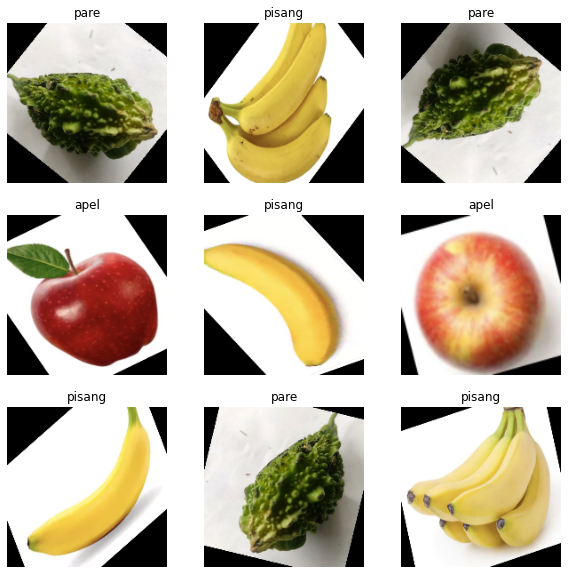

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = 3

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', 
                 activation = 'relu', input_shape = (180,180,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


24/24 [==============================] - 267s 11s/step - loss: 32.9252 - accuracy: 0.6107 - val_loss: 0.5935 - val_accuracy: 0.8125
Epoch 2/10
24/24 [==============================] - 223s 9s/step - loss: 0.4886 - accuracy: 0.8294 - val_loss: 0.3942 - val_accuracy: 0.8646
Epoch 3/10
24/24 [==============================] - 223s 9s/step - loss: 0.3073 - accuracy: 0.9076 - val_loss: 0.6252 - val_accuracy: 0.8125
Epoch 4/10
24/24 [==============================] - 224s 9s/step - loss: 0.3503 - accuracy: 0.8802 - val_loss: 0.3177 - val_accuracy: 0.8906
Epoch 5/10
24/24 [==============================] - 223s 9s/step - loss: 0.1993 - accuracy: 0.9258 - val_loss: 0.2846 - val_accuracy: 0.9010
Epoch 6/10
24/24 [==============================] - 223s 9s/step - loss: 0.1741 - accuracy: 0.9336 - val_loss: 0.2512 - val_accuracy: 0.9062
Epoch 7/10
24/24 [==============================] - 223s 9s/step - loss: 0.1550 - accuracy: 0.9388 - val_loss: 0.2810 - val_accuracy: 0.9010
Epoch 8/10
24/24 [====

In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)
  
gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://35194.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7fc7a4b3ce90>,
 'http://127.0.0.1:7860/',
 'https://35194.gradio.app')